In [1]:
from src.data_structures.features import *
from src.data_structures.Instance import Instance
from src.solvers.DLHeu import DLHeu
from src.solvers.collection import SolverCollection,Solution,SolverConfig
from fastai.tabular.all import slide,valley

In [11]:

instances = [Instance.generate(i*5,20) for i in range(1,100,5)]




In [12]:
from src.data_structures.features import ItemBatchFeature, ItemSingleFeature


In [13]:
from src.data_structures import Instance


class ExperimentalFeature(ItemBatchFeature):

    @staticmethod
    def batch_evaluate(instance: Instance) -> float:
        """Average of """
        syns = [list([0,0]) for i in range(instance.n_items)]
        for pol_gain, value in instance.polynomial_gains.items():
            if value < 0:
                reference = 0
            else:
                reference = 1
            for item in instance.key_to_set(pol_gain):
                syns[item][reference] += 1*value
        syns = np.array(syns)
        return syns[:,1]/instance.budget

In [14]:
deepl = DLHeu(
                [
                    ExperimentalFeature,
                    UpperCostOverBudget,
                    LowerCostOverBudget,
                    ProfitOverBudget,
                    CountPSynergiesOverNItems,
                    IsInContSol,
                 ],
                [IsInOptSol],
                [100,100,100]
            )

epoch,train_loss,valid_loss,accuracy,time
0,0.286164,0.280510,0.900000,00:00
1,0.240451,0.280349,0.891753,00:00
2,0.227290,0.244776,0.905155,00:00
3,0.233167,0.271992,0.897938,00:00
4,0.230012,0.365402,0.895876,00:00
5,0.234822,0.283767,0.901031,00:00
6,0.228887,0.328805,0.896907,00:00
7,0.222280,0.257535,0.893814,00:00
8,0.226764,0.300145,0.896907,00:00
9,0.220859,0.349072,0.889691,00:00


Sol(of:77273.67222341962,time:7.214999675750732)


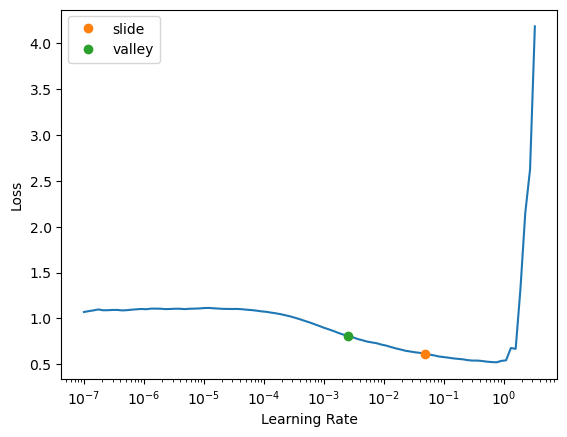

In [15]:
training_data = deepl.create_training_data(instances)
learner = deepl.create_model(training_data)
a = learner.lr_find(suggest_funcs=(slide, valley),stop_div=False)
learner.fit(20,lr=(a[1]+a[0])/2)
instance = Instance.generate(2000,10)
sol = deepl.solve(instance,learner)
print(sol)